In [1]:
import math 
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

C:\Users\VIBIN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Great! To summarize, remember to initialize your variables, create a session and run the operations inside the session.

Next, you'll also have to know about placeholders. A placeholder is an object whose value you can specify only later. To specify values for a placeholder, you can pass in values by using a "feed dictionary" (feed_dict variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session.

In [3]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)
    X = tf.constant(np.random.randn(3, 1), name='X')
    W = tf.constant(np.random.randn(4, 3), name='W')
    b = tf.constant(np.random.randn(4, 1), name='b')
    Y = tf.add(tf.matmul(W, X), b)
    ### END CODE HERE ### 
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    
    ### START CODE HERE ###
    sess = tf.Session()
    result = sess.run(Y)
    ### END CODE HERE ### 
    
    # close the session 
    sess.close()

    return result

print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [4]:
def sigmoid(z):
    x = tf.placeholder(tf.float32, name='x')
    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x: z})
    return result

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))


sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [5]:
def cost(logits, labels):
    
    # Create the placeholders for "logits" (z) and "labels" (y) 
    z = tf.placeholder(tf.float32, name='z')
    y = tf.placeholder(tf.float32, name='y')
    
    # Use the loss function 
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
     
    sess = tf.Session()
    cost = sess.run(cost, feed_dict={z: logits, y:labels})
    sess.close()
    
    return cost

In [6]:
def one_hot_matrix(labels, C):
    
    C = tf.constant(C, name='C')
    
    
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot

In [7]:
def ones(shape):
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    return ones

In [8]:
print ("ones = " + str(ones([3,5])))

ones = [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [9]:
train_dataset = h5py.File('C:/Users/VIBIN/Desktop/practice/computer-vision/Tuning Hyperparameters/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('C:/Users/VIBIN/Desktop/practice/computer-vision/Tuning Hyperparameters/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

y = 5


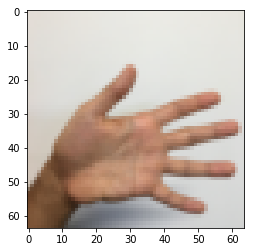

In [10]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [11]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [12]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X, Y

In [13]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y:0", shape=(6, ?), dtype=float32)


In [14]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                  
        
    W1 = tf.get_variable("W1", [25, 12288], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())
   

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [15]:
def forward_propagation(X, parameters):
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
                                                                     # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                                # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                 # Z3 = np.dot(W3,Z2) + b3
    
    
    return Z3

In [16]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [17]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                                 labels=labels))
    return cost

In [18]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

cost = Tensor("Mean:0", shape=(), dtype=float32)


All the backpropagation and the parameters update is taken care of in in programming frameworks. 

 an "optimizer" object is called along with the cost while running the tf.session. It performs an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer :

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

To make the optimization you would do:

_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

Here, _ takes on the evaluated value of optimizer, which we don't need (and c takes the value of the cost variable).

In [19]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []
    
    X, Y = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            
            seed = seed +1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches
            
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
  

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572938
Cost after epoch 400: 0.468799
Cost after epoch 500: 0.380979
Cost after epoch 600: 0.313819
Cost after epoch 700: 0.254258
Cost after epoch 800: 0.203795
Cost after epoch 900: 0.166410
Cost after epoch 1000: 0.141497
Cost after epoch 1100: 0.107579
Cost after epoch 1200: 0.086229
Cost after epoch 1300: 0.059415
Cost after epoch 1400: 0.052237


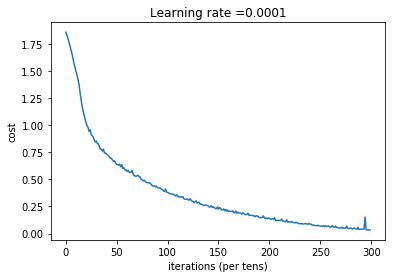

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.71666664


In [20]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [21]:
 type(lambda x: x+1)

function

In [31]:
a=np.random.randn(6,6)
print(a)

[[-0.58109937 -1.52371826  0.4758167   1.61487078 -0.66043177 -0.12098694]
 [ 0.86577891 -1.13806969 -0.93740935  1.26400334 -0.47515891 -1.46976091]
 [ 0.22412302 -0.0794533   2.00335894  0.38340386 -0.86819008 -2.30773615]
 [ 0.74572808 -0.68689954 -1.03021365 -0.51263558 -1.49630953 -0.70512521]
 [ 0.95857125  0.37753842 -0.01443625  1.16548056  2.26525933 -1.54525018]
 [ 1.92593465  1.65938826  0.99037618  0.52635482  0.77889343  0.43467654]]


In [38]:
a[0:6,0:6]

array([[-0.58109937, -1.52371826,  0.4758167 ,  1.61487078, -0.66043177,
        -0.12098694],
       [ 0.86577891, -1.13806969, -0.93740935,  1.26400334, -0.47515891,
        -1.46976091],
       [ 0.22412302, -0.0794533 ,  2.00335894,  0.38340386, -0.86819008,
        -2.30773615],
       [ 0.74572808, -0.68689954, -1.03021365, -0.51263558, -1.49630953,
        -0.70512521],
       [ 0.95857125,  0.37753842, -0.01443625,  1.16548056,  2.26525933,
        -1.54525018],
       [ 1.92593465,  1.65938826,  0.99037618,  0.52635482,  0.77889343,
         0.43467654]])

In [39]:
['a', 'b', 'c'] + [1, 2, 3]

['a', 'b', 'c', 1, 2, 3]